In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv("flipkart_product.csv", encoding='ISO-8859-1', on_bad_lines='skip', quoting=3)


In [6]:
df

ProductName  \
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White  Black        Elegant High Speed-Honey Comb Cooling Pad & Ic...  Blower)"       "??3   
                                                                                                                 Blower)"       "??3   
                                                                                                                 Blower)"       "??3   
                                                                                                                 Blower)"       "??3   
                                                                                                                 Blower)"       "??3   
...                                                                                                                               ...   
"NIVEA Soft Light Moisturizer for Face           Hand & Body  Non-Sticky Cream with Vitamin E & Jojoba OilÂ ... â¹142              5   
                                                                                                                â¹142              5   
                                                                                                                â¹142              5   
                                                                                                                â¹142              4   
                                               NaN          NaN                                                NaN               NaN   

                                                                                                                                     Price  \
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White  Black        Elegant High Speed-Honey Comb Cooling Pad & Ic...  Blower)"             999"   
                                                                                                                 Blower)"             999"   
                                                                                                                 Blower)"             999"   
                                                                                                                 Blower)"             999"   
                                                                                                                 Blower)"             999"   
...                                                                                                                                    ...   
"NIVEA Soft Light Moisturizer for Face           Hand & Body  Non-Sticky Cream with Vitamin E & Jojoba OilÂ ... â¹142            Terrific   
                                                                                                                â¹142            Terrific   
                                                                                                                â¹142           Just wow!   
                                                                                                                â¹142     Worth the money   
                                               NaN          NaN                                                NaN                    NaN   

                                                                                                                             Rate  \
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White  Black        Elegant High Speed-Honey Comb Cooling Pad & Ic...  Blower)"       5   
                                                                                                                 Blower)"       5   
                                                                                                                 Blower)"       3   
                                                                                                                 Blower)"       1   
                                                                                                           

In [7]:
df.head()

ProductName  \
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White Black Elegant High Speed-Honey Comb Cooling Pad & Ice... Blower)"       "??3   
                                                                                                         Blower)"       "??3   
                                                                                                         Blower)"       "??3   
                                                                                                         Blower)"       "??3   
                                                                                                         Blower)"       "??3   

                                                                                                                  Price  \
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White Black Elegant High Speed-Honey Comb Cooling Pad & Ice... Blower)"  999"   
                                                                                                         Blower)"  999"   
                                                                                                         Blower)"  999"   
                                                                                                         Blower)"  999"   
                                                                                                         Blower)"  999"   

                                                                                                                  Rate  \
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White Black Elegant High Speed-Honey Comb Cooling Pad & Ice... Blower)"    5   
                                                                                                         Blower)"    5   
                                                                                                         Blower)"    3   
                                                                                                         Blower)"    1   
                                                                                                         Blower)"    3   

                                                                                                                            Review  \
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White Black Elegant High Speed-Honey Comb Cooling Pad & Ice... Blower)"           Super!   
                                                                                                         Blower)"          Awesome   
                                                                                                         Blower)"             Fair   
                                                                                                         Blower)"  Useless product   
                                                                                                         Blower)"             Fair   

                                                                                                                                                             Summary  
"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White Black Elegant High Speed-Honey Comb Cooling Pad & Ice... Blower)"  Great cooler.. excellent air flow and for this...  
                                                                                                         Blower)"             Best budget 2 fit cooler. Nice cooling  
                                                                                                         Blower)"  The quality is good but the power of air is de...  
                                                                                                         Blower)"                 Very bad product it's a only a fan  
                                                                                                         Blower)"                                      Ok ok product

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 184087 entries, ('"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White', ' Black', ' Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber', ' Blower)"') to ('\x1a', nan, nan, nan)
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  184084 non-null  object
 1   Price        144931 non-null  object
 2   Rate         88372 non-null   object
 3   Review       35780 non-null   object
 4   Summary      8473 non-null    object
dtypes: object(5)
memory usage: 8.5+ MB


In [9]:
df.isnull().sum()

,0
ProductName,3
Price,39156
Rate,95715
Review,148307
Summary,175614


In [10]:
df.describe()

,ProductName,Price,Rate,Review,Summary
count,184084,144931,88372,35780,8473
unique,20647,35936,32480,20056,5700
top,5,5,Good,Good,Good
freq,30288,14996,4430,1646,480


In [11]:
df.shape

(184087, 5)

In [12]:
df.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [13]:
df = df.dropna(subset = ['Review'])

In [14]:
# Convert 'Rate' to numeric, invalid values will become NaN
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Drop rows where Rate is NaN
df = df.dropna(subset=['Rate'])

# Create binary labels: 1 for positive review (Rate >= 3), 0 otherwise
labels = (df['Rate'] >= 3).astype(int)

texts = df['Review'].astype(str)


<ipython-input-14-ca882bac9ac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')


In [15]:
print(labels.head())

"Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White  Black  Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber  Blower)"    1
                                                                                                                 Blower)"    1
                                                                                                                 Blower)"    1
                                                                                                                 Blower)"    0
                                                                                                                 Blower)"    1
Name: Rate, dtype: int64


In [16]:
tokenizer = Tokenizer(num_words = 1000, oov_token ="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [17]:
maxlen = 200
padded_sequences = pad_sequences(sequences, maxlen= maxlen)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [19]:
model = Sequential([
    Embedding(input_dim=10000,output_dim = 128, input_length = maxlen),
    LSTM(64, dropout= 0.2, recurrent_dropout = 0.2),
    Dense(1, activation = "sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics = ['accuracy'])


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - accuracy: 0.8406 - loss: 0.4215 - val_accuracy: 0.8638 - val_loss: 0.2583
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - accuracy: 0.9124 - loss: 0.1878 - val_accuracy: 0.9977 - val_loss: 0.0350
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.9950 - loss: 0.0260 - val_accuracy: 0.9989 - val_loss: 0.0098
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.9977 - loss: 0.0136 - val_accuracy: 0.9977 - val_loss: 0.0110
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.9981 - loss: 0.0095 - val_accuracy: 0.9989 - val_loss: 0.0081


In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 1.0000 - loss: 0.0020
Test Accuracy: 100.00%


In [24]:
y_pred_prob = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [25]:
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

In [26]:
print("Classification report:", classification_report(y_test, y_pred))

Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       946

    accuracy                           1.00      1092
   macro avg       1.00      1.00      1.00      1092
weighted avg       1.00      1.00      1.00      1092



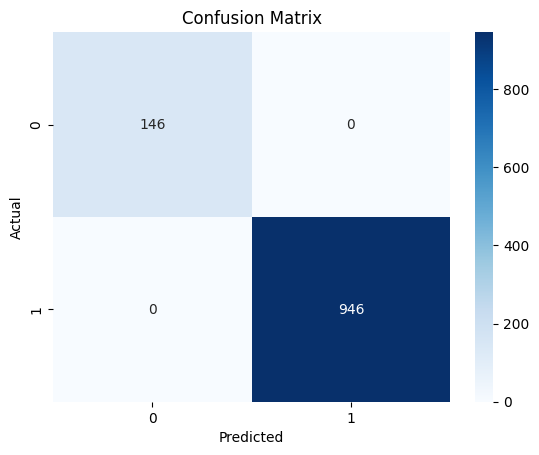

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


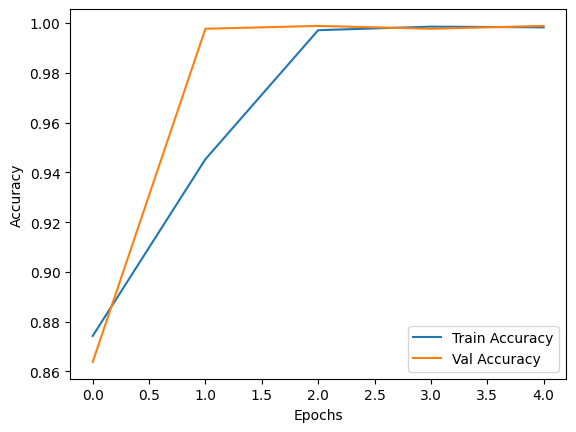

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
def predict_sentiment():
    user_input = input("Enter a product review: ")
    seq = tokenizer.texts_to_sequences([user_input])
    padded = pad_sequences(seq, maxlen=maxlen)
    pred = model.predict(padded)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})")

# Run prediction
predict_sentiment()

Enter a product review: Worst experience ever, very disappointed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Sentiment: Negative 😞 (Confidence: 0.02)
